In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
data_test = pd.read_csv('test.csv', index_col=['Id'])
data_train = pd.read_csv('train.csv', index_col=['Id'])

In [248]:
train = data_train.drop(['SalePrice'], axis=1).reset_index(drop=True)
df = pd.concat([train, data_test]).reset_index(drop=True)

In [249]:
df.select_dtypes(object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2916,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [250]:
colums_PCA = df.select_dtypes(np.number).columns.to_list()

In [251]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 79 columns and 2919 Rows.
There are 34 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
PoolQC,0,2909,99.7,object
MiscFeature,0,2814,96.4,object
Alley,0,2721,93.2,object
Fence,0,2348,80.4,object
FireplaceQu,0,1420,48.6,object
LotFrontage,0,486,16.6,float64
GarageFinish,0,159,5.4,object
GarageQual,0,159,5.4,object
GarageCond,0,159,5.4,object
GarageYrBlt,0,159,5.4,float64


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [253]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [254]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [255]:
# df.replace(['Ex','Gd', 'TA', 'Fa', 'Po'], [5,4,3,2,1], inplace=True)

In [256]:
df['HouseAge'] = 2022 - df['YearBuilt']
df['RemodAge'] = 2022 - df['YearRemodAdd']
df['SoldAge'] = 2022 - df['YrSold']

In [257]:
df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0) 
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [258]:
PoolQC={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, np.NaN: 0}
df['PoolQC'] = df['PoolQC'].map(PoolQC)

In [259]:
GarageFinish={'Fin':3,'RFn':2,'Unf':1, np.NaN: 0}
df['GarageFinish'] = df['GarageFinish'].map(GarageFinish)

In [260]:
GarageQual={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, np.NaN: 0}
df['GarageQual'] = df['GarageQual'].map(GarageQual)

In [261]:
df.sort_values(by='LotArea', ascending=True, inplace=True)
df['LotFrontage'] = df['LotFrontage'].fillna(method='bfill')

In [262]:
MiscFeature = ['Shed', 'Gar2', 'Othr', 'TenC', ]
df['MiscFeature'] = [1 if i in MiscFeature else 0 for i in df['MiscFeature']]

In [263]:
df['Fence'] = [1 if i in df['Fence'].unique() else 0 for i in df['Fence']]

In [264]:
df['Alley'] = [1 if i in df['Alley'].unique() else 0 for i in df['Alley']]

In [265]:
BsmtExposure ={'Gd':4,'Av':3,'Mn':2,'No':1, np.NaN: 0}
df['BsmtExposure'] = df['BsmtExposure'].map(BsmtExposure)

In [266]:
BsmtCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, np.NaN: 0}
df['BsmtCond'] = df['BsmtCond'].map(BsmtCond)

In [267]:
BsmtQual={'Ex':4,'Gd':3,'TA':2,'Fa':1,np.NaN: 0}
df['BsmtQual'] = df['BsmtQual'].map(BsmtQual)

In [268]:
GarageCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, np.NaN: 0}
df['GarageCond'] = df['GarageCond'].map(GarageCond)

In [269]:
KitchenQual={'Ex':4,'Gd':3,'TA':2,'Fa':1,np.NaN: 0}
df["KitchenQual"] = df["KitchenQual"].map(KitchenQual)

In [270]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [271]:
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0)

In [272]:
FireplaceQu={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, np.NaN: 0}
df["FireplaceQu"] = df["FireplaceQu"].map(FireplaceQu)

In [273]:
df['MasVnrType'] = [1 if i in ['BrkFace', 'Stone', 'BrkCmn'] else 0 for i in df['MasVnrType']]

In [274]:
GarageType={'Attchd':3,'2Types':3,'Detchd':2,'BuiltIn':1,'Basment':1, 'CarPort':1, np.NaN: 0}
df['GarageType'] = df['GarageType'].map(GarageType)

In [275]:
ExterCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, np.NaN: 0}
df["ExterCond"] = df["ExterCond"].map(ExterCond)

In [276]:
BsmtFinType ={'GLQ':5, 'ALQ':4, 'BLQ':3, 'Rec':2, 'LwQ':1, 'Unf':1, np.NaN: 0}
df['BsmtFinType1'] = df['BsmtFinType1'].map(BsmtFinType)
df['BsmtFinType2'] = df['BsmtFinType2'].map(BsmtFinType)

In [277]:
ExterQual={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, np.NaN: 0}
df["ExterQual"] = df["ExterQual"].map(ExterQual)

In [278]:
HeatingQC={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, np.NaN: 0}
df["HeatingQC"] = df["HeatingQC"].map(HeatingQC)

In [279]:
df['CentralAir'] = [1 if i == 'Y' else 0 for i in df['CentralAir']]
df['PavedDrive'] = [1 if i == 'Y' else 0 for i in df['PavedDrive']]

In [280]:
df['SaleType'] = [1 if i == 'WD' else 0 for i in df['SaleType']]

In [281]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mean())

In [282]:
df['SaleType'] = [1 if i == 'WD' else 0 for i in df['SaleType']]

In [283]:
LotShape={'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0}
df['LotShape'] = df['LotShape'].map(LotShape)

In [284]:
LandContour ={'Lvl':3, 'HLS':2, 'Bnk':1, 'Low':0}
df['LandContour'] = df['LandContour'].map(LandContour)

In [285]:
LandSlope ={'Gtl':2, 'Mod':1, 'Sev':0}
df['LandSlope'] = df['LandSlope'].map(LandSlope)

In [286]:
df['RoofMatl'] = [1 if i == 'CompShg' else 0 for i in df['RoofMatl']]

In [287]:
Electrical={'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':0, np.NaN:0}
df['Electrical'] = df['Electrical'].map(Electrical)

In [288]:
Functional={'Typ':4, 'Min2':3, 'Min1':3, 'Mod':2, 'Maj1':1, 'Maj2':1, 'Sev':0, np.NaN:0}
df['Functional'] = df['Functional'].map(Functional)

In [289]:
df['Street'] = [1 if i == 'Pave' else 0 for i in df['Street']]

In [290]:
df["Condition1"] = [1 if i == 'Norm' else 0 for i in df["Condition1"]]
df["Condition2"] = [1 if i == 'Norm' else 0 for i in df["Condition2"]]

In [291]:
MSZoning={'A': 0, "C": 0, "FV": 0, "I": 0, "RH": 1, "RL":2, "RP":2, "RM":3}
df['MSZoning'] = df['MSZoning'].map(MSZoning)
df["MSZoning"] = df["MSZoning"].fillna(0)

In [292]:
df['SaleCondition'] = [1 if i == 'Normal' else 0 for i in df['SaleCondition']]

In [293]:
df['Utilities'] = [1 if i == 'AllPub' else 0 for i in df['Utilities']]

In [294]:
# df['MSSubClass_v'] = df['MSSubClass'].map(lambda x: 1 if x in [20, 60, 120] else 0)

In [295]:
df = pd.get_dummies(data=df, columns=['LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Neighborhood'])

In [296]:
df.sort_index(inplace=True)

In [297]:
# df.isnull().sum().sum()

In [298]:
x_pre, y_pre = df.loc[:1459], np.log(data_train['SalePrice'])
y_pre = np.log(y_pre)
x_test_pre = df.loc[1460:]

In [299]:
df_PCA = df[colums_PCA]
df_PCA

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [300]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from umap import UMAP
from scipy.stats import norm
import optuna
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import rand_score, jaccard_score, adjusted_mutual_info_score, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [301]:
pca = PCA(n_components=2) 
tsne = TSNE(n_components=2, perplexity=50)
umap = UMAP(n_components=2, n_neighbors=200)

X = RobustScaler().fit_transform(df_PCA)


X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)
X_umap = umap.fit_transform(X)

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


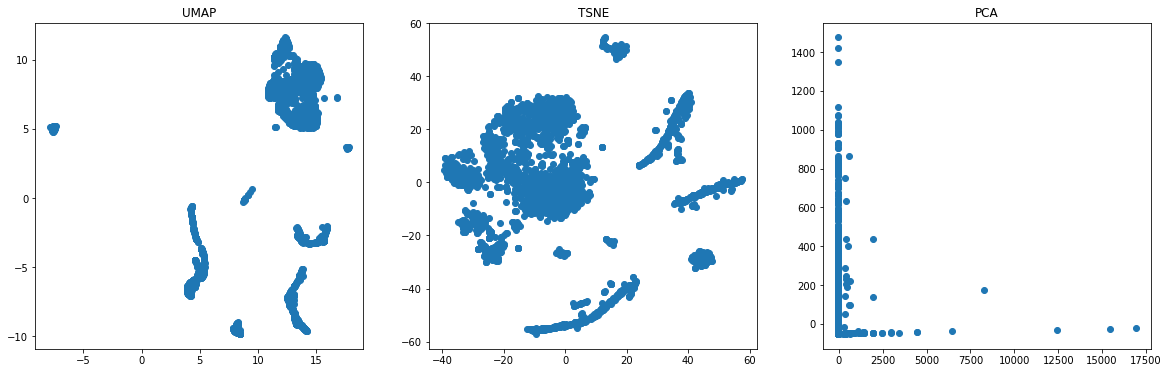

In [302]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
ax1.scatter(X_umap[:, 0], X_umap[:, 1])
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1])
ax3.scatter(X_pca[:, 0], X_pca[:, 1])
ax1.set_title('UMAP')
ax2.set_title('TSNE')
ax3.set_title('PCA');

In [303]:
X = {
    'pca'  : X_pca,
    'tsne' : X_tsne,
    'umap' : X_umap
}

models = {
    'KMeans' : KMeans(10),
    'AggCls' : AgglomerativeClustering(10),
    'DBSCAN' : DBSCAN(eps=1)
}

def plot_results(X: dict, models: dict):
    fig, ax = plt.subplots(3, 3, figsize=(12, 12))
    for i in np.arange(3):
        for j in np.arange(3):
            X_ = list(X.values())[i]
            model = list(models.values())[j].fit(X_)
            colors = model.labels_
            sil_score = silhouette_score(X_, model.labels_)
#            
            ax[i, j].scatter(X_[:, 0], X_[:, 1], c=colors, cmap='viridis', marker='.', s=10)
            ax[i, j].set_title(f'{list(X.keys())[i]}/{list(models.keys())[j]}: sil_score={sil_score:.3f}')

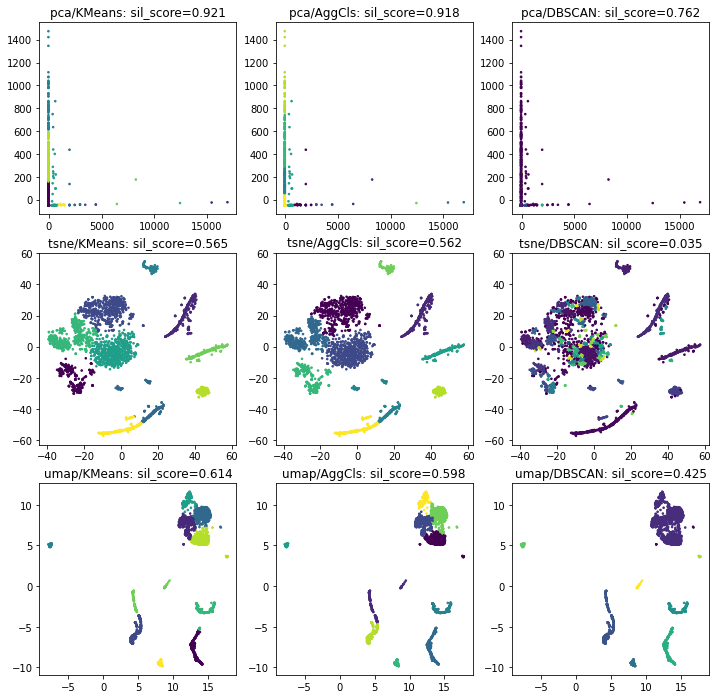

In [304]:
plot_results(X, models)

In [305]:
ag = KMeans(10)
ag_umap = ag.fit_predict(X_umap)
ag_tsne = ag.fit_predict(X_tsne)
ag_pca = ag.fit_predict(X_pca)

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
# ax1 = fig.add_subplot(1,3,1, projection='3d')
# ax2 = fig.add_subplot(1,3,2, projection='3d')
# ax3 = fig.add_subplot(1,3,3, projection='3d')
# ax1.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c = ag_umap, cmap='plasma')
# ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c = ag_tsne, cmap='plasma')
# ax3.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = ag_pca, cmap='plasma')
# ax1.set_title('UMAP')
# ax2.set_title('TSNE')
# ax3.set_title('PCA');

In [306]:
df['Cluster'] = ag_pca

In [307]:
df = pd.concat([df, pd.get_dummies(df['Cluster'], prefix=('Cluster'))], axis=1)
df.drop('Cluster', axis=1, inplace=True)

In [308]:
freq = data_train.groupby('MSSubClass').count()
mean_MSSub = data_train.groupby('MSSubClass').mean()['SalePrice']
labeled_MSSub = pd.cut(mean_MSSub, bins = 3, labels = [0, 1, 2])
labeled_MSSub_dict = labeled_MSSub.to_dict()
df['MSSubClass'] = df['MSSubClass'].map(labeled_MSSub_dict)

In [309]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, StackingRegressor, VotingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

In [310]:
X_train = df.loc[:1459]
X_test = df.loc[1460:]
Y_train = np.log(data_train['SalePrice'])

In [311]:
corr_df = pd.DataFrame(X_train.corrwith(Y_train), columns=['Коррелияция с ценой']).sort_values(by='Коррелияция с ценой', ascending=False)
corr_df[abs(corr_df['Коррелияция с ценой']) > 0.5]
X_train = X_train[corr_df[abs(corr_df['Коррелияция с ценой']) > 0.1].index.to_list()]
X_train

In [312]:
import optuna
 def objective(trial):
    x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

    params={'verbosity':-1,
            'lambda_l2':trial.suggest_float('lambda_l2', 0.1, 1),
            'max_depth':trial.suggest_int('max_depth', 5, 100, step=0.05),
            'num_leaves':trial.suggest_int('num_leaves', 5, 105, step=10),
            'learning_rate':trial.suggest_float('learning_rate',0.001, 0.1, step=0.01),
            'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 0.8 , step=0.1)
            }

    reg = CatBoostRegressor(**params)
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_valid)
    mape = r2_score(y_valid, y_pred)
    return mape


study = optuna.create_study()
study.optimize(objective, n_trials=100, timeout=600)

In [313]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1168, 176), (292, 176), (1168,), (292,))

In [314]:
cbr = CatBoostRegressor(iterations = 9000, learning_rate = .08, eval_metric = 'RMSE',
                        random_seed = 42, logging_level=  'Silent', loss_function = 'RMSE',
                        od_type = 'Iter', od_wait = 1000, one_hot_max_size = 20,
                        l2_leaf_reg = 100, depth = 2, rsm = .6,
                        random_strength = 2, bagging_temperature = 10)

cbr.fit(x_train, y_train)
print("train R2:", r2_score(cbr.predict(x_train), y_train))
print("test R2:", r2_score(cbr.predict(x_valid), y_valid))
print("train RMSE:", mean_squared_error(cbr.predict(x_train), y_train, squared=False))
print("test RMSE:", mean_squared_error(cbr.predict(x_valid), y_valid, squared=False))

train R2: 0.9718848874143577
test R2: 0.8899342767903662
train RMSE: 0.0637245617271162
test RMSE: 0.13272949669696868


In [315]:
cbr.fit(X_train, Y_train)
Y = np.exp(cbr.predict(X_test))
sp = pd.read_csv('sample_submission.csv', index_col=['Id'])
sp['SalePrice'] = Y
sp.to_csv('cbr_dop.csv')

In [316]:
from scipy.stats import shapiro
shapiro(cbr.predict(x_valid) - y_valid)
reducials = cbr.predict(x_valid) - y_valid

ShapiroResult(statistic=0.9586061239242554, pvalue=2.2424349310767866e-07)

In [326]:
lgbm = LGBMRegressor(objective='regression',num_leaves=4, learning_rate=0.01, n_estimators=5000,max_bin=200, bagging_fraction=0.75, bagging_freq=5,
                     bagging_seed=7,feature_fraction=0.2, feature_fraction_seed=7, verbose=-1)

lgbm.fit(x_train, y_train)
print("train R2:", r2_score(lgbm.predict(x_train), y_train))
print("test R2:", r2_score(lgbm.predict(x_valid), y_valid))
print("train RMSE:", mean_squared_error(lgbm.predict(x_train), y_train, squared=False))
print("test RMSE:", mean_squared_error(lgbm.predict(x_valid), y_valid, squared=False))

In [327]:
cbr1 = CatBoostRegressor()
params = {'iterations' : [9000], 
        'learning_rate' : [.08], 
        'eval_metric' : ['RMSE'],
        'random_seed' : [42], 
        'logging_level' : ['Silent'], 
        'loss_function' : ['RMSE'],
        'od_type' : ['Iter'], 
        'od_wait' : [1000], 
        'one_hot_max_size' : [20],
        'l2_leaf_reg' : [100], 
        'depth' : [2], 
        'rsm' : [.6],
        'random_strength' : [2], 
        'bagging_temperature' : [10]
}
gscv = GridSearchCV(cbr1, param_grid=params, scoring='r2', cv=5, n_jobs=3)
gscv.fit(X_train, Y_train)
model = gscv.best_estimator_

## Optune

In [328]:
# Set param's range
lr_from = 0.001
lr_to = 0.1
fr_from = 0.1
fr_to = 1
dec_from = 1
dec_to = 10
nl_from = 4
nl_to = 20

# 1. Define an objective function to be maximized.
def objective(trial):
    # 2. Suggest values for the hyperparameters using a trial object.
    learning_rate = trial.suggest_float('learning_rate', lr_from, lr_to, log=True)
    bagging_fraction = trial.suggest_float('bagging_fraction', fr_from, fr_to, log=True)
    feature_fraction = trial.suggest_float('feature_fraction', fr_from, fr_to, log=True)
    num_leaves = trial.suggest_int('num_leaves', nl_from, nl_to, log=True)
    bagging_freq = trial.suggest_int('bagging_freq', dec_from, dec_to, log=True)
    bagging_seed = trial.suggest_int('bagging_seed', dec_from, dec_to, log=True)
    feature_fraction_seed = trial.suggest_int('feature_fraction_seed', dec_from, dec_to, log=True)
    # Models
    regr_obj = LGBMRegressor(objective='regression',num_leaves=num_leaves, learning_rate=learning_rate, 
                         n_estimators=5000,max_bin=200, bagging_fraction=bagging_fraction,
                         bagging_freq=bagging_freq, bagging_seed=bagging_seed,feature_fraction=feature_fraction,
                         feature_fraction_seed=feature_fraction_seed, verbose=-1)
    # Fit    
    regr_obj_data = regr_obj.fit(X,Y)
    pred = regr_obj_data.predict(X_test)
    error = r2_score(Y_test, pred)
    return error

# 3. Create a study object and optimize the objective function.
optune = optuna.create_study(direction='minimize')
optune.optimize(objective, n_trials=500, show_progress_bar=True)
optune.best_params

## StackingRegressor

In [329]:
from sklearn.linear_model import LinearRegression

In [330]:
st = StackingRegressor(estimators=[
                                    ('gbr', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                    min_samples_split=10, loss='huber', random_state =42)),

                                    ('xgboost', XGBRegressor(learning_rate=0.01, n_estimators=3000, max_depth=3, gamma=0, colsample_bytree=0.7, scale_pos_weight=1,
                                    reg_alpha=0.00006, objective='reg:squarederror')),

                                    ('cbr', CatBoostRegressor(iterations = 9000, learning_rate = .08, eval_metric = 'RMSE', random_seed = 42, logging_level=  'Silent',
                                    loss_function = 'RMSE', od_type = 'Iter', od_wait = 1000, one_hot_max_size = 20, l2_leaf_reg = 100, depth = 2, rsm = .6,
                                    random_strength = 2, bagging_temperature = 10)),
                                    
                                    ('lgbm', LGBMRegressor(objective='regression',num_leaves=4, learning_rate=0.01, n_estimators=5000,max_bin=200, bagging_fraction=0.75,
                                    bagging_freq=5, bagging_seed=7,feature_fraction=0.2, feature_fraction_seed=7, verbose=-1))

                                   ],
                                   final_estimator=SVR(), cv=5)

st.fit(X_train, Y_train)

In [331]:
print("train R2:", r2_score(st.predict(X_train), Y_train))
print("train RMSE:", mean_squared_error(st.predict(X_train), Y_train, squared=False))

In [332]:
Y = np.exp(st.predict(X_test))
sp = pd.read_csv('sample_submission.csv', index_col=['Id'])
sp['SalePrice'] = Y
sp.to_csv('st.csv')

## VotingRegressor

In [333]:
vc = VotingRegressor(estimators=[
                                    ('gbr', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                    min_samples_split=10, loss='huber', random_state =42)),
                                    
                                    ('xgboost', XGBRegressor(learning_rate=0.01, n_estimators=3000, max_depth=3, gamma=0, colsample_bytree=0.7, scale_pos_weight=1,
                                    reg_alpha=0.00006, objective='reg:squarederror')),

                                    ('cbr', CatBoostRegressor(iterations = 9000, learning_rate = .08, eval_metric = 'RMSE', random_seed = 42, logging_level=  'Silent',
                                    loss_function = 'RMSE', od_type = 'Iter', od_wait = 1000, one_hot_max_size = 20, l2_leaf_reg = 100, depth = 2, rsm = .6,
                                    random_strength = 2, bagging_temperature = 10)),

                                    ('lgbm', LGBMRegressor(objective='regression',num_leaves=4, learning_rate=0.01, n_estimators=5000,max_bin=200, bagging_fraction=0.75,
                                    bagging_freq=5, bagging_seed=7,feature_fraction=0.2, feature_fraction_seed=7, verbose=-1))

                                    # ('lgbm', LGBMRegressor(objective='regression',num_leaves=4, learning_rate=0.01, n_estimators=5000,max_bin=200, bagging_fraction=0.75,
                                    # bagging_freq=5, bagging_seed=7,feature_fraction=0.2, feature_fraction_seed=7, verbose=-1)),

                                    # ('rfc', RandomForestRegressor(n_estimators=60, max_depth=14, max_features='sqrt', min_samples_split=4, min_samples_leaf=1)),
                                    # ('dtc', DecisionTreeRegressor(max_depth=8, min_samples_split=5, min_samples_leaf=2)),
                                    # ('svc', SVR())
                                   ])

vc.fit(X_train, Y_train)

In [334]:
print("train R2:", r2_score(vc.predict(X_train), Y_train))
print("train RMSE:", mean_squared_error(vc.predict(X_train), Y_train, squared=False))

In [335]:
Y = np.exp(vc.predict(X_test))
sp = pd.read_csv('sample_submission.csv', index_col=['Id'])
sp['SalePrice'] = Y
sp.to_csv('vc.csv')

## Shap

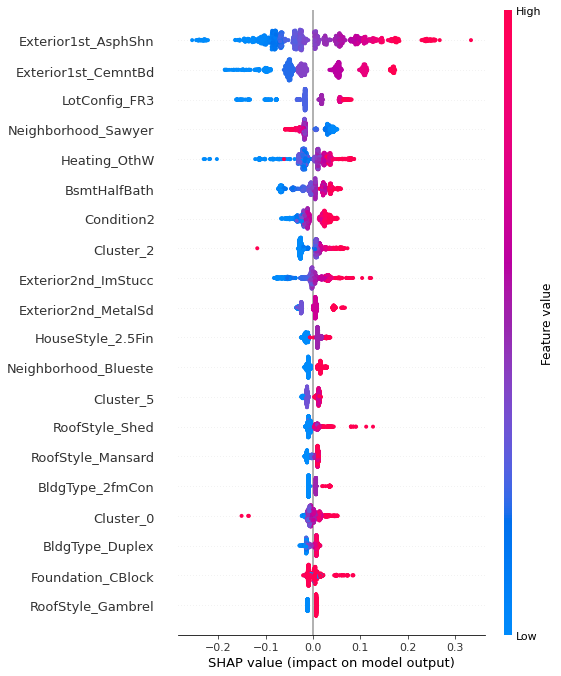

In [336]:
import shap 
sorted_feature_importance = cbr.feature_importances_.argsort()
explainer = shap.TreeExplainer(cbr)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = df.columns[sorted_feature_importance]);

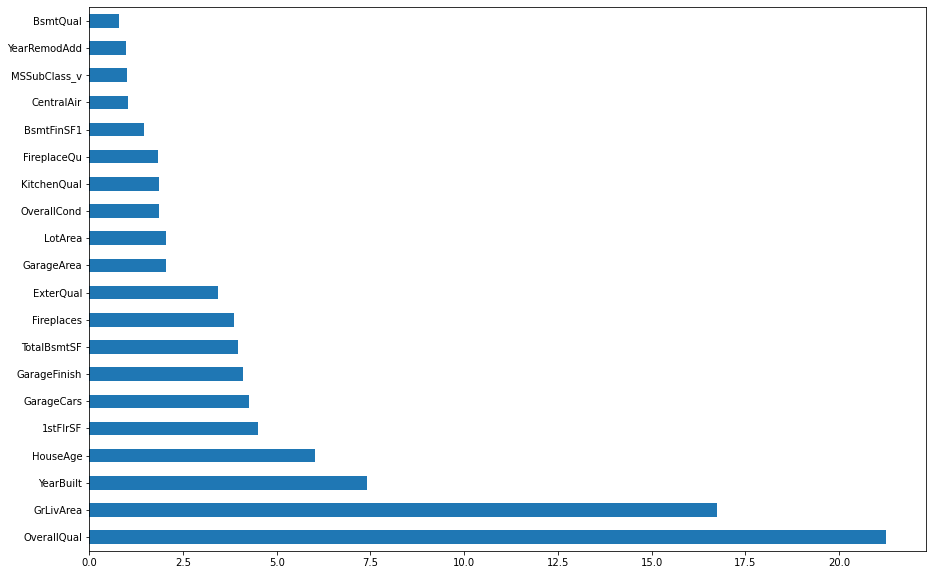

In [337]:
fig, ax = plt.subplots(figsize=(15,10))
feature_importances_cat1 = pd.Series(cbr.feature_importances_, index= df.columns)
feature_importances_cat1.nlargest(20).plot(kind='barh');